In [11]:
# Initial imports
from pathlib import Path
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


In [2]:
# Loading data
df_heart = pd.read_csv("Resources/cleaned_data.csv")
df_heart.head()

,gender,age,education,current_smoker,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_blood_pressure,diastolic_blood_pressure,bmi,heart_rate,glucose,heart_stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [3]:
df_heart.dtypes

gender                       object
age                           int64
education                    object
current_smoker                int64
cigarettes_per_day          float64
bp_meds                     float64
prevalent_stroke             object
prevalent_hypertension        int64
diabetes                      int64
total_cholesterol           float64
systolic_blood_pressure     float64
diastolic_blood_pressure    float64
bmi                         float64
heart_rate                  float64
glucose                     float64
heart_stroke                 object
dtype: object

In [4]:
gender_dummies = pd.get_dummies(df_heart["gender"])
education_dummies = pd.get_dummies(df_heart["education"])
prevalent_stroke_dummies = pd.get_dummies(df_heart["prevalent_stroke"])

print(gender_dummies)
print(education_dummies)
print(prevalent_stroke_dummies)

      Female  Male
0          0     1
1          1     0
2          0     1
3          1     0
4          1     0
...      ...   ...
3651       0     1
3652       0     1
3653       0     1
3654       0     1
3655       1     0

[3656 rows x 2 columns]
      graduate  postgraduate  primaryschool  uneducated
0            0             1              0           0
1            0             0              1           0
2            0             0              0           1
3            1             0              0           0
4            1             0              0           0
...        ...           ...            ...         ...
3651         1             0              0           0
3652         0             0              0           1
3653         0             0              0           1
3654         1             0              0           0
3655         0             0              1           0

[3656 rows x 4 columns]
      no  yes
0      1    0
1      1    0
2      1

In [5]:
df_heart = pd.concat([df_heart, gender_dummies], axis=1)
df_heart = pd.concat([df_heart, education_dummies], axis=1)
df_heart = pd.concat([df_heart, prevalent_stroke_dummies], axis=1)
# Drop the original education column
df_heart = df_heart.drop(columns=["gender", "education", "prevalent_stroke"])

# Display the DataFrame
df_heart.head()

,age,current_smoker,cigarettes_per_day,bp_meds,prevalent_hypertension,diabetes,total_cholesterol,systolic_blood_pressure,diastolic_blood_pressure,bmi,...,glucose,heart_stroke,Female,Male,graduate,postgraduate,primaryschool,uneducated,no,yes
0,39,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,...,77.0,No,0,1,0,1,0,0,1,0
1,46,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,...,76.0,No,1,0,0,0,1,0,1,0
2,48,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,...,70.0,No,0,1,0,0,0,1,1,0
3,61,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,...,103.0,yes,1,0,1,0,0,0,1,0
4,46,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,...,85.0,No,1,0,1,0,0,0,1,0


In [6]:
df_heart.dtypes

age                           int64
current_smoker                int64
cigarettes_per_day          float64
bp_meds                     float64
prevalent_hypertension        int64
diabetes                      int64
total_cholesterol           float64
systolic_blood_pressure     float64
diastolic_blood_pressure    float64
bmi                         float64
heart_rate                  float64
glucose                     float64
heart_stroke                 object
Female                        uint8
Male                          uint8
graduate                      uint8
postgraduate                  uint8
primaryschool                 uint8
uneducated                    uint8
no                            uint8
yes                           uint8
dtype: object

# RANDOM FOREST

In [7]:
X = df_heart.copy()
X.drop("heart_stroke", axis=1, inplace=True)
X.head()

,age,current_smoker,cigarettes_per_day,bp_meds,prevalent_hypertension,diabetes,total_cholesterol,systolic_blood_pressure,diastolic_blood_pressure,bmi,heart_rate,glucose,Female,Male,graduate,postgraduate,primaryschool,uneducated,no,yes
0,39,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0,1,0,0,1,0
1,46,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,1,0,0,0,1,0,1,0
2,48,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0,1,1,0
3,61,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,1,0,0,0,1,0
4,46,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,1,0,1,0,0,0,1,0


In [9]:
# Define target vector
y = df_heart["heart_stroke"].ravel()
y[:5]

array(['No', 'No', 'No', 'yes', 'No'], dtype=object)

In [12]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [13]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [14]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [15]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [17]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [18]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [20]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,767,8
Actual 1,137,2


Accuracy Score : 0.8413566739606126
Classification Report
              precision    recall  f1-score   support

          No       0.85      0.99      0.91       775
         yes       0.20      0.01      0.03       139

    accuracy                           0.84       914
   macro avg       0.52      0.50      0.47       914
weighted avg       0.75      0.84      0.78       914



In [21]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1321126746693474, 'systolic_blood_pressure'),
 (0.12559843203199395, 'bmi'),
 (0.12293300224192044, 'age'),
 (0.11982394708157226, 'total_cholesterol'),
 (0.11906550176560099, 'diastolic_blood_pressure'),
 (0.11332747151642789, 'glucose'),
 (0.09243305723102928, 'heart_rate'),
 (0.04858738529463293, 'cigarettes_per_day'),
 (0.018677571084471243, 'prevalent_hypertension'),
 (0.015532032544939364, 'uneducated'),
 (0.013791049741034105, 'Male'),
 (0.013238490401948438, 'Female'),
 (0.01322965200826765, 'primaryschool'),
 (0.012844718426913425, 'current_smoker'),
 (0.010141923224448316, 'postgraduate'),
 (0.009716168246890566, 'graduate'),
 (0.007194177833471512, 'bp_meds'),
 (0.006781126234511799, 'diabetes'),
 (0.0025245547709482666, 'yes'),
 (0.00244706364963008, 'no')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

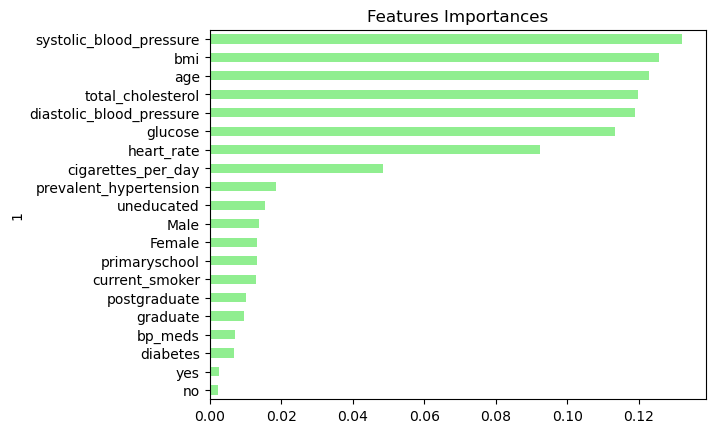

In [22]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)